In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Task A

## Iteration 1

In [ ]:
# import csv file for Task A - Iteration 1
task_a = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_a_iter1.csv'
df_a = pd.read_csv(task_a)
df_a.drop('playerID', axis=1, inplace=True) # drop PlayerID as Decision Tree does not work with categorical data

In [ ]:
print(df_a.shape)
print(df_a['inducted'].value_counts())
df_a.head()

(19105, 69)
0    17846
1     1259
Name: inducted, dtype: int64


BatG  BatAB  BatR  BatH  ...  World_Series_MVP  AL_MVP  NL_MVP  inducted
0   331      4     0     0  ...                 0       0       0         0
1  3298  12364  2174  3771  ...                 0       0       1         1
2   437    944   102   216  ...                 0       0       0         0
3   448      5     0     0  ...                 0       0       0         0
4    15     21     1     2  ...                 0       0       0         0

[5 rows x 69 columns]

In [ ]:
# Split columns
X_a = df_a.drop(columns=['inducted'], axis=1)
y_a = df_a['inducted']
print(X_a.shape, y_a.shape)

(19105, 68) (19105,)


In [ ]:
# 80/20 split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.20, random_state=3)

In [ ]:
clf_a = DecisionTreeClassifier()
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 223 errors


In [ ]:
print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

[[3469  128]
 [  95  129]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3597
           1       0.50      0.58      0.54       224

    accuracy                           0.94      3821
   macro avg       0.74      0.77      0.75      3821
weighted avg       0.95      0.94      0.94      3821

Accuracy of classifier is 94.16383145773358%


### Hyperparameter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_a_ran = GridSearchCV(clf_a, hyperparameters)
best_model_ran = clf_a_ran.fit(X_train_a,y_train_a)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 6
Best min_samples_split: 5
Best min_samples_leaf: 5


In [ ]:
clf_a = DecisionTreeClassifier(max_depth=param_vals[0], min_samples_split=param_vals[1], min_samples_leaf=param_vals[2])
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

Classifier made 162 errors
[[3541   56]
 [ 106  118]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3597
           1       0.68      0.53      0.59       224

    accuracy                           0.96      3821
   macro avg       0.82      0.76      0.79      3821
weighted avg       0.95      0.96      0.96      3821

Accuracy of classifier is 95.76027218005758%


### Tree Diagram

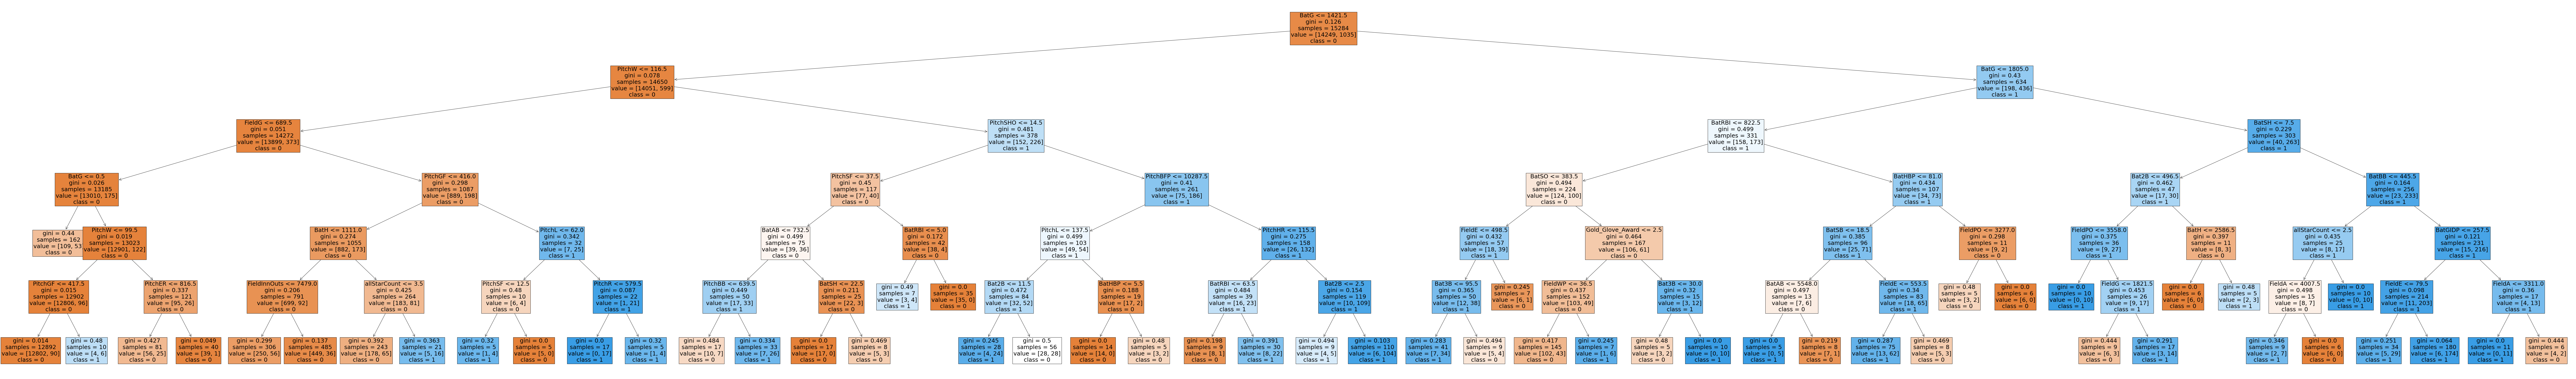

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(200,30))
plot_tree(clf_a, filled=True, feature_names=X_a.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_a.png')

### Feature Importance

Feature: 0, Score: 0.51097
Feature: 1, Score: 0.01275
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01442
Feature: 4, Score: 0.00983
Feature: 5, Score: 0.00405
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01521
Feature: 8, Score: 0.00205
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00259
Feature: 11, Score: 0.00764
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00646
Feature: 14, Score: 0.00654
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00094
Feature: 17, Score: 0.05309
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00392
Feature: 20, Score: 0.00230
Feature: 21, Score: 0.00689
Feature: 22, Score: 0.00739
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00371
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.22175
Feature: 30, Score: 0.01096
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.01962
Feature: 35, Score: 0.00000
Fe

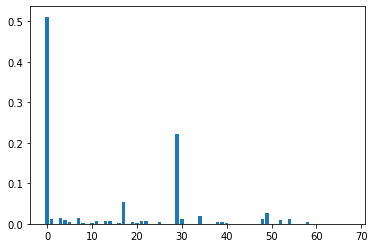

In [ ]:
# get importance
importance = clf_a.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Iteration 2

In [ ]:
# import csv file for Task A - Iteration 2
task_a = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_a_iter2.csv'
df_a = pd.read_csv(task_a)
df_a.drop('playerID', axis=1, inplace=True) # drop PlayerID as Decision Tree does not work with categorical data

In [ ]:
print(df_a.shape)
print(df_a['inducted'].value_counts())
df_a.head()

(17901, 14)
0    16709
1     1192
Name: inducted, dtype: int64


daysActive  BatG     BatBA  BatHR  ...  Silver_Slugger  MVP  avgSalary  inducted
0        4156   331  0.000000      0  ...               0    0    1322821         0
1        8209  3315  0.305317    761  ...               0    1          0         1
2        3456   438  0.228571     13  ...               0    0          0         0
3        4817   450  0.000000      0  ...               0    0     575000         0
4        1676    15  0.095238      0  ...               0    0     327000         0

[5 rows x 14 columns]

In [ ]:
# Split columns
X_a = df_a.drop(columns=['inducted'], axis=1)
y_a = df_a['inducted']
print(X_a.shape, y_a.shape)

(17901, 13) (17901,)


In [ ]:
# 80/20 split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.20, random_state=3)

In [ ]:
clf_a = DecisionTreeClassifier()
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 190 errors


In [ ]:
print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

[[3250   91]
 [  99  141]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3341
           1       0.61      0.59      0.60       240

    accuracy                           0.95      3581
   macro avg       0.79      0.78      0.78      3581
weighted avg       0.95      0.95      0.95      3581

Accuracy of classifier is 94.69421949176208%


### Hyperparameter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_a_ran = GridSearchCV(clf_a, hyperparameters)
best_model_ran = clf_a_ran.fit(X_train_a,y_train_a)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 6
Best min_samples_split: 4
Best min_samples_leaf: 5


In [ ]:
clf_a = DecisionTreeClassifier(max_depth=param_vals[0], min_samples_split=param_vals[1], min_samples_leaf=param_vals[2])
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

Classifier made 166 errors
[[3296   45]
 [ 121  119]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3341
           1       0.73      0.50      0.59       240

    accuracy                           0.95      3581
   macro avg       0.85      0.74      0.78      3581
weighted avg       0.95      0.95      0.95      3581

Accuracy of classifier is 95.36442334543423%


### Tree Diagram

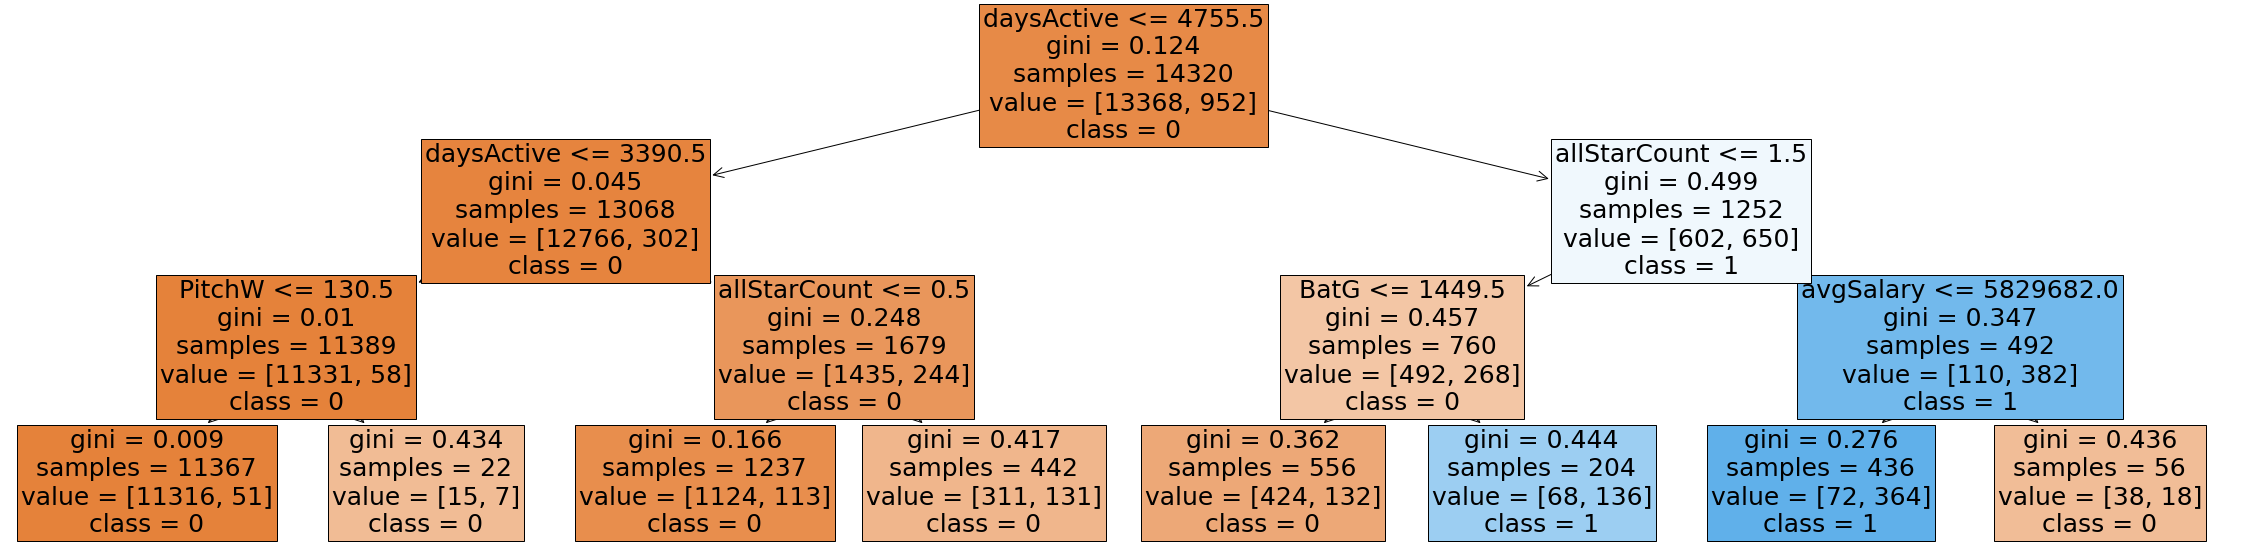

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(200,30))
plot_tree(clf_a, filled=True, feature_names=X_a.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_a.png')

## Iteration 3

In [ ]:
# import csv file for Task A -Iteration 3
task_a = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_a_iter3.csv'
df_a = pd.read_csv(task_a)
df_a.drop('playerID', axis=1, inplace=True) # drop PlayerID as Decision Tree does not work with categorical data

In [ ]:
print(df_a.shape)
print(df_a['inducted'].value_counts())
df_a.head()

(17901, 16)
0    16709
1     1192
Name: inducted, dtype: int64


daysActive  BatG     BatBA  ...  MVP  avgSalary  inducted
0        4156   331  0.000000  ...    0    1322821         0
1        8209  3298  0.304998  ...    1          0         1
2        3456   437  0.228814  ...    0          0         0
3        4817   448  0.000000  ...    0     575000         0
4        1676    15  0.095238  ...    0     327000         0

[5 rows x 16 columns]

In [ ]:
# Split columns
X_a = df_a.drop(columns=['inducted'], axis=1)
y_a = df_a['inducted']
print(X_a.shape, y_a.shape)

(17901, 15) (17901,)


In [ ]:
# 80/20 split
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.20, random_state=3)

In [ ]:
clf_a = DecisionTreeClassifier()
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 189 errors


In [ ]:
print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

[[3256   85]
 [ 104  136]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3341
           1       0.62      0.57      0.59       240

    accuracy                           0.95      3581
   macro avg       0.79      0.77      0.78      3581
weighted avg       0.95      0.95      0.95      3581

Accuracy of classifier is 94.72214465233175%


### Hyperparameter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_a_ran = GridSearchCV(clf_a, hyperparameters)
best_model_ran = clf_a_ran.fit(X_train_a,y_train_a)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 6
Best min_samples_split: 2
Best min_samples_leaf: 5


In [ ]:
clf_a = DecisionTreeClassifier(max_depth=param_vals[0], min_samples_split=param_vals[1], min_samples_leaf=param_vals[2])
clf_a.fit(X_train_a, y_train_a)
y_pred_a = clf_a.predict(X_test_a)
errors = (y_pred_a != y_test_a).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_a, y_pred_a)*100))

Classifier made 149 errors
[[3307   34]
 [ 115  125]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3341
           1       0.79      0.52      0.63       240

    accuracy                           0.96      3581
   macro avg       0.88      0.76      0.80      3581
weighted avg       0.95      0.96      0.95      3581

Accuracy of classifier is 95.83915107511868%


### Tree Diagram

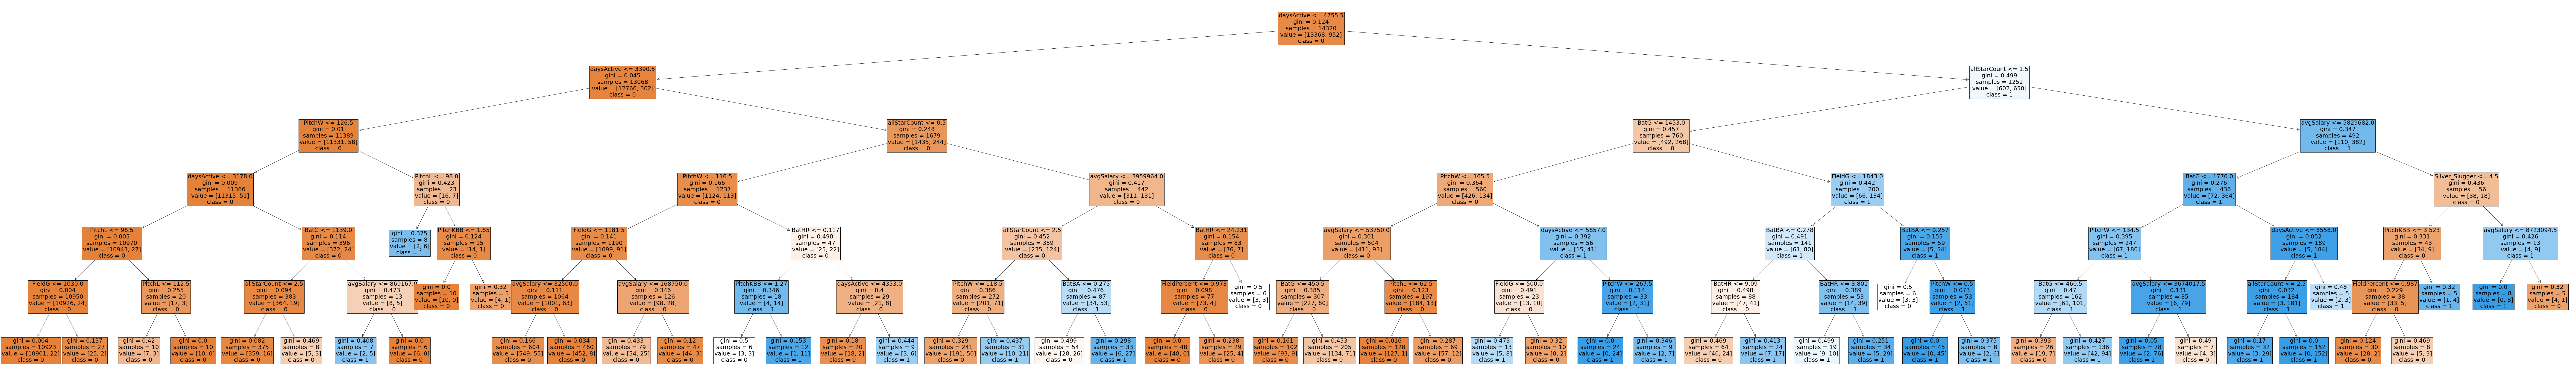

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(200,30))
plot_tree(clf_a, filled=True, feature_names=X_a.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_a.png')

# Task B

## Iteration 1

In [ ]:
# import csv file for Task B - Iteration 1
task_b = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_b_iter1.csv'
df_b = pd.read_csv(task_b)
df_b.drop('playerID', axis=1, inplace=True)

In [ ]:
print(df_b.shape)
print(df_b['inducted'].value_counts())
df_b.head()

(1259, 69)
0    942
1    317
Name: inducted, dtype: int64


BatG  BatAB  BatR  BatH  ...  World_Series_MVP  AL_MVP  NL_MVP  inducted
0  3298  12364  2174  3771  ...                 0       0       1         1
1   263     21     0     2  ...                 0       0       0         0
2   482   1019    79   216  ...                 0       0       0         0
3  1281   4019   591  1082  ...                 0       0       0         0
4  1424   5557   844  1588  ...                 0       0       0         0

[5 rows x 69 columns]

In [ ]:
# Split columns
X_b = df_b.drop(columns=['inducted'], axis=1)
y_b = df_b['inducted']
print(X_b.shape, y_b.shape)

(1259, 68) (1259,)


In [ ]:
# 80/20 split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20, random_state=3)

In [ ]:
clf_b = DecisionTreeClassifier()
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b!= y_test_b).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 38 errors


In [ ]:
print(confusion_matrix(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

[[167  22]
 [ 16  47]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       189
           1       0.68      0.75      0.71        63

    accuracy                           0.85       252
   macro avg       0.80      0.81      0.80       252
weighted avg       0.85      0.85      0.85       252

Accuracy of classifier is 84.92063492063492%


### Hyperparamter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_b_ran = GridSearchCV(clf_b, hyperparameters)
best_model_ran = clf_b_ran.fit(X_train_b,y_train_b)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 4
Best min_samples_split: 3
Best min_samples_leaf: 1


In [ ]:
clf_b = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1)
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b != y_test_b).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_b,  y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

Classifier made 33 errors
[[174  15]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       189
           1       0.75      0.71      0.73        63

    accuracy                           0.87       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.87      0.87      0.87       252

Accuracy of classifier is 86.90476190476191%


### Tree Diagram

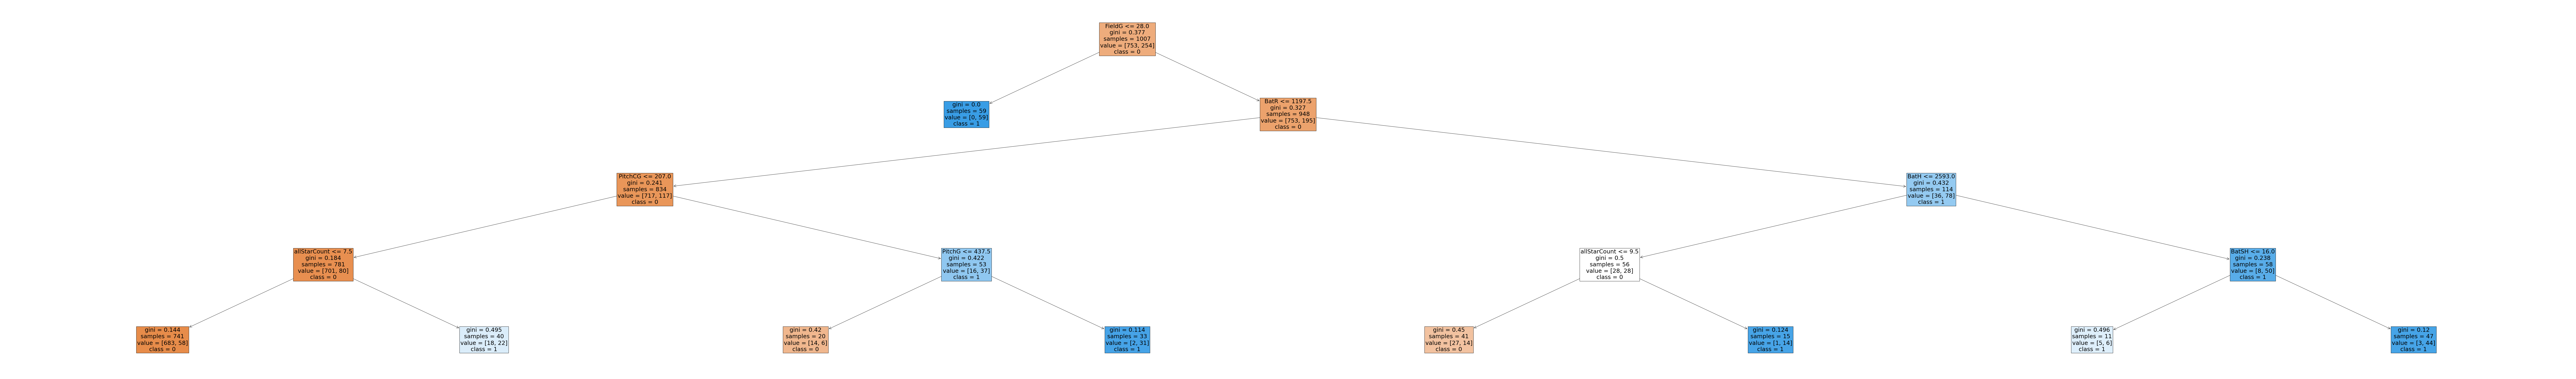

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(200,30))
plot_tree(clf_b, filled=True, feature_names=X_b.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_b.png')

## Iteration 2

In [ ]:
# import csv file for Task B - Iteration 2
task_b = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_b_iter2.csv'
df_b = pd.read_csv(task_b)
df_b.drop('playerID', axis=1, inplace=True)

In [ ]:
print(df_b.shape)
print(df_b['inducted'].value_counts())
df_b.head()

(1192, 14)
0    942
1    250
Name: inducted, dtype: int64


daysActive  BatG     BatBA  BatHR  ...  Silver_Slugger  MVP  avgSalary  inducted
0        8209  3315  0.305317    761  ...               0    1          0         1
1        3756   263  0.095238      0  ...               0    0    1440056         0
2        7420   486  0.210117      3  ...               0    0          0         0
3        4754  1281  0.269221     37  ...               0    0          0         0
4        4395  1432  0.285202      9  ...               0    0          0         0

[5 rows x 14 columns]

In [ ]:
# Split columns
X_b = df_b.drop(columns=['inducted'], axis=1)
y_b = df_b['inducted']
print(X_b.shape, y_b.shape)

(1192, 13) (1192,)


In [ ]:
# 80/20 split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20, random_state=3)

In [ ]:
clf_b = DecisionTreeClassifier()
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b!= y_test_b).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 34 errors


In [ ]:
print(confusion_matrix(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

[[171  13]
 [ 21  34]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       184
           1       0.72      0.62      0.67        55

    accuracy                           0.86       239
   macro avg       0.81      0.77      0.79       239
weighted avg       0.85      0.86      0.85       239

Accuracy of classifier is 85.77405857740585%


### Hyperparamter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_b_ran = GridSearchCV(clf_b, hyperparameters)
best_model_ran = clf_b_ran.fit(X_train_b,y_train_b)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 5
Best min_samples_split: 6
Best min_samples_leaf: 1


In [ ]:
clf_b = DecisionTreeClassifier(max_depth=param_vals[0], min_samples_split=param_vals[1], min_samples_leaf=param_vals[2])
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b != y_test_b).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_b,  y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

Classifier made 32 errors
[[177   7]
 [ 25  30]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       184
           1       0.81      0.55      0.65        55

    accuracy                           0.87       239
   macro avg       0.84      0.75      0.78       239
weighted avg       0.86      0.87      0.86       239

Accuracy of classifier is 86.61087866108787%


### Tree Diagram

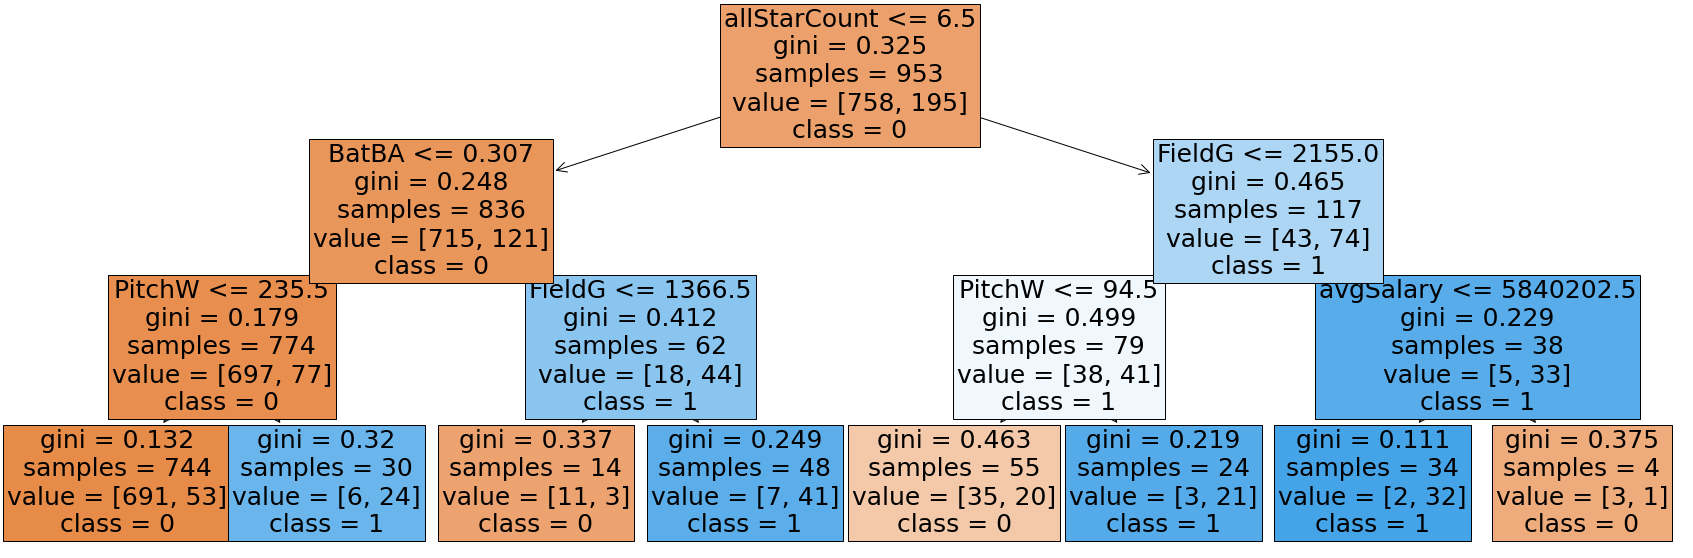

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(150,30))
plot_tree(clf_b, filled=True, feature_names=X_b.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_b.png')

## Iteration 3

In [ ]:
# import csv file for Task B - Iteration 3
task_b = '/content/drive/My Drive/ECE 356/Lab 4/finaldata/task_b_iter3.csv'
df_b = pd.read_csv(task_b)
df_b.drop('playerID', axis=1, inplace=True)

In [ ]:
print(df_b.shape)
print(df_b['inducted'].value_counts())
df_b.head()

(1192, 16)
0    942
1    250
Name: inducted, dtype: int64


daysActive  BatG     BatBA  ...  MVP  avgSalary  inducted
0        8209  3298  0.304998  ...    1          0         1
1        3756   263  0.095238  ...    0    1440056         0
2        7420   482  0.211973  ...    0          0         0
3        4754  1281  0.269221  ...    0          0         0
4        4395  1424  0.285766  ...    0          0         0

[5 rows x 16 columns]

In [ ]:
# Split columns
X_b = df_b.drop(columns=['inducted'], axis=1)
y_b = df_b['inducted']
print(X_b.shape, y_b.shape)

(1192, 15) (1192,)


In [ ]:
# 80/20 split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20, random_state=3)

In [ ]:
clf_b = DecisionTreeClassifier()
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b!= y_test_b).sum()
print('Classifier made {} errors'.format(errors))

Classifier made 46 errors


In [ ]:
print(confusion_matrix(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

[[161  23]
 [ 23  32]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       184
           1       0.58      0.58      0.58        55

    accuracy                           0.81       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.81      0.81      0.81       239

Accuracy of classifier is 80.75313807531381%


### Hyperparamter Tuning

In [ ]:
max_depth = [1,2,3,4,5,6,7]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5]
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

clf_b_ran = GridSearchCV(clf_b, hyperparameters)
best_model_ran = clf_b_ran.fit(X_train_b,y_train_b)

param = ['max_depth', 'min_samples_split', 'min_samples_leaf']
param_vals = []
for i in param:
  param_vals.append(best_model_ran.best_estimator_.get_params()[i])

print('Best max_depth:', param_vals[0])
print('Best min_samples_split:', param_vals[1])
print('Best min_samples_leaf:', param_vals[2])

Best max_depth: 5
Best min_samples_split: 5
Best min_samples_leaf: 1


In [ ]:
clf_b = DecisionTreeClassifier(max_depth=param_vals[0], min_samples_split=param_vals[1], min_samples_leaf=param_vals[2])
clf_b.fit(X_train_b, y_train_b)
y_pred_b = clf_b.predict(X_test_b)
errors = (y_pred_b != y_test_b).sum()
print('Classifier made {} errors'.format(errors))

print(confusion_matrix(y_test_b,  y_pred_b))
print(classification_report(y_test_b, y_pred_b))
print('Accuracy of classifier is {}%'.format(accuracy_score(y_test_b, y_pred_b)*100))

Classifier made 31 errors
[[175   9]
 [ 22  33]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       184
           1       0.79      0.60      0.68        55

    accuracy                           0.87       239
   macro avg       0.84      0.78      0.80       239
weighted avg       0.86      0.87      0.86       239

Accuracy of classifier is 87.02928870292888%


### Tree Diagram

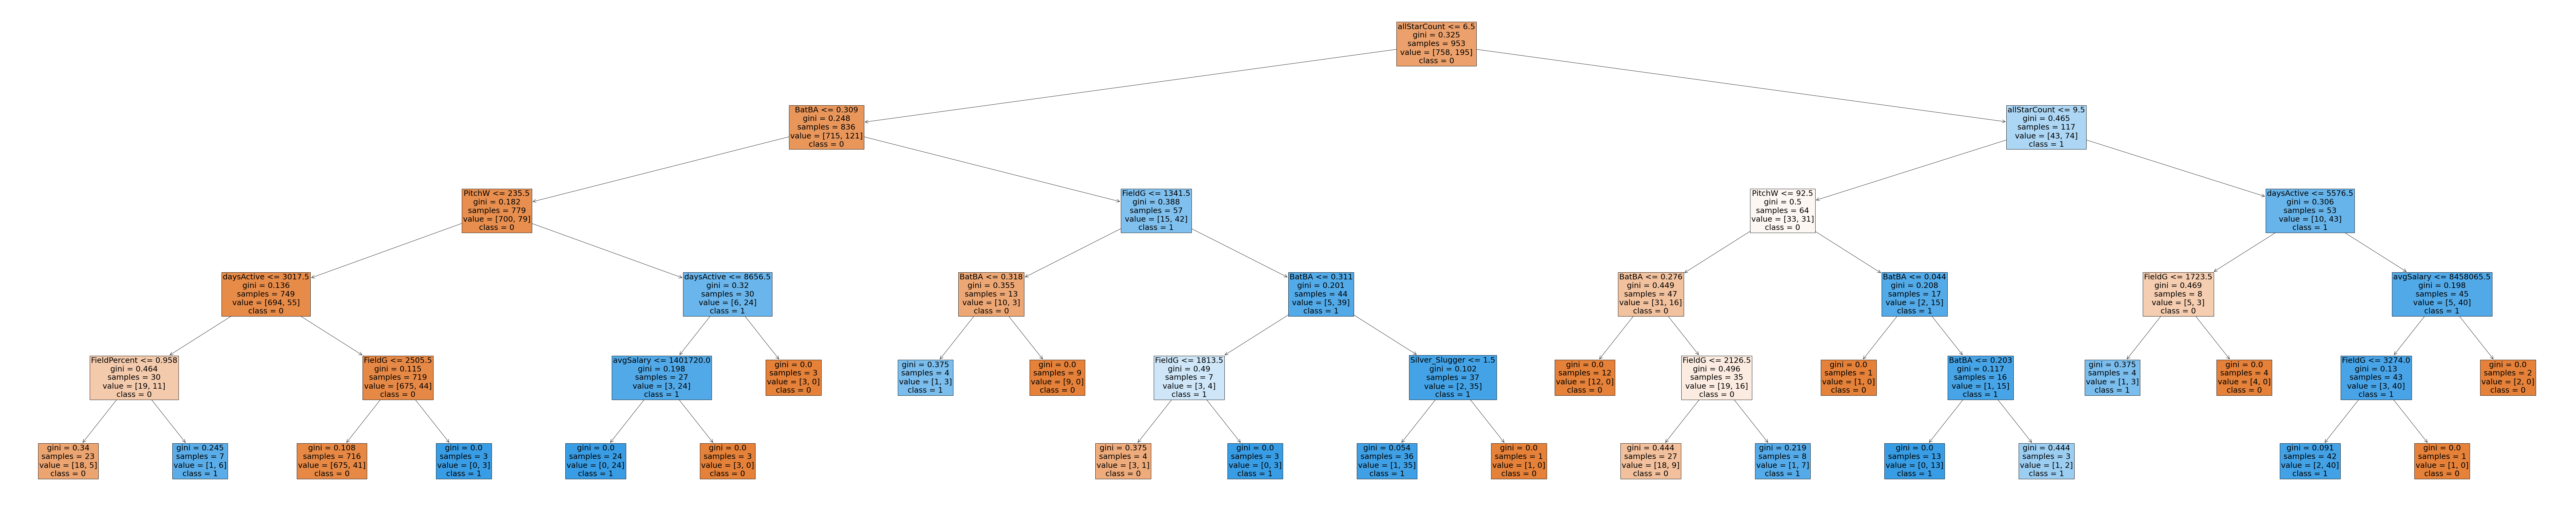

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot Tree
plt.figure(figsize=(150,30))
plot_tree(clf_b, filled=True, feature_names=X_b.columns, class_names=['0','1'], fontsize=25)
plt.show()
plt.savefig('task_b.png')